In [116]:
# plan is to calculate food along trajectories
# who has the most food?
# does anyone get cold shocked?

In [117]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [118]:
# make default figure size 2x bigger, can toggle this
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [119]:
# default font size
matplotlib.rcParams.update({'font.size': 20})

In [120]:
tmpath = 'NP/expt_NP3/output/'
tmfile = 'traj_file_1.nc'
tmdata = nc.Dataset(tmpath+tmfile,'r')

In [121]:
tmdata.variables

OrderedDict([(u'time', <type 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: seconds
                  long_name: Time after release
                  _FillValue: -1
              unlimited dimensions: 
              current shape = (366,)
              filling off), (u'location', <type 'netCDF4._netCDF4.Variable'>
              int32 location(particle)
                  long_name: Line number in the release file
                  _FillValue: -1
              unlimited dimensions: particle
              current shape = (810,)
              filling off), (u'lon', <type 'netCDF4._netCDF4.Variable'>
              float32 lon(particle, time)
                  units: degrees_east
                  long_name: Longitude
                  _FillValue: 1.26765e+30
              unlimited dimensions: particle
              current shape = (810, 366)
              filling off), (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(particle, time

In [122]:
tmlat = tmdata.variables['lat'][:]
tmlon = tmdata.variables['lon'][:]
tmSST = tmdata.variables['temperature'][:]
tmNPP = tmdata.variables['salinity'][:] # = NPP
tmzoo = tmdata.variables['zooplankton'][:]

In [123]:
tmSST.shape

(810, 366)

In [124]:
# this gets rid of masked vals and reshapes:
test = tmSST.compressed()
test.shape

(215901,)

In [125]:
# get rid of zeros (when particle goes out)
test2 = test[test!=0]
test2.shape

(205363,)

In [126]:
np.where(test2 == 0)

(array([], dtype=int64),)

In [127]:
SST.shape

(158508,)

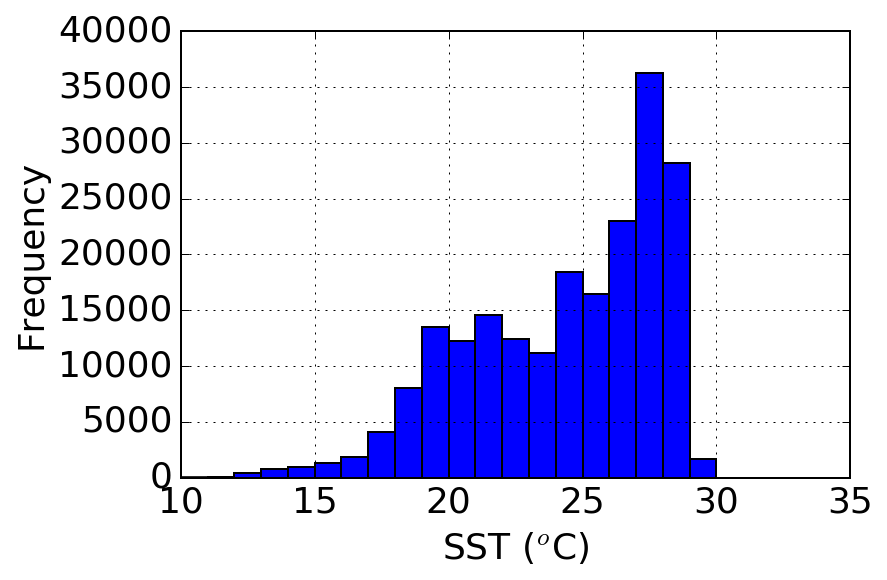

In [128]:
SST = test2

matplotlib.rcParams.update({'font.size': 18})

mybins = np.arange(10,32,1)

a= plt.hist(SST, bins = mybins)
# having an issue with masked data

plt.xlabel("SST ($^o$C)")
plt.ylabel('Frequency')
plt.grid()

In [129]:
hist = a[0]
bins = a[1]
print hist
print bins

[  2.00000000e+00   5.20000000e+01   4.13000000e+02   7.77000000e+02
   9.21000000e+02   1.30700000e+03   1.85900000e+03   4.08100000e+03
   8.03600000e+03   1.34560000e+04   1.22520000e+04   1.45390000e+04
   1.24290000e+04   1.12090000e+04   1.83830000e+04   1.64630000e+04
   2.30080000e+04   3.62310000e+04   2.81970000e+04   1.68200000e+03
   0.00000000e+00]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


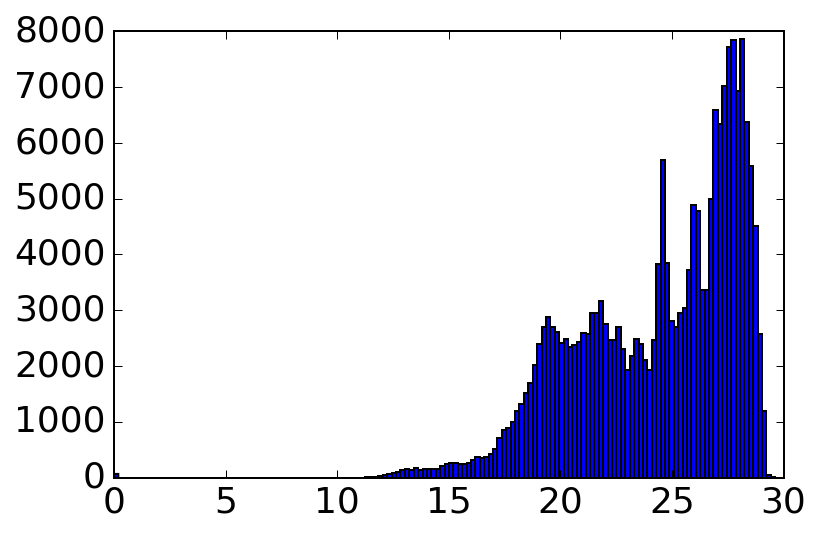

In [130]:
a= plt.hist(test2, bins = 'auto')

In [131]:
# less than 10C dead and less than 15 C for 10 days 50% chance of dying
# neither of these are relevant here
# which means that with passive release over a wide domain they are not encountering thermal stress
# it would be interesting to compare this with Florida relseases

# Food

In [132]:
# need to precondition food arrays in same way
# mask out zeros to nans
# but if I am summing this is not an issue

In [133]:
NPP_sum = np.sum(tmNPP,axis = 1)

In [134]:
NPP_sum = NPP_sum[NPP_sum!=0]

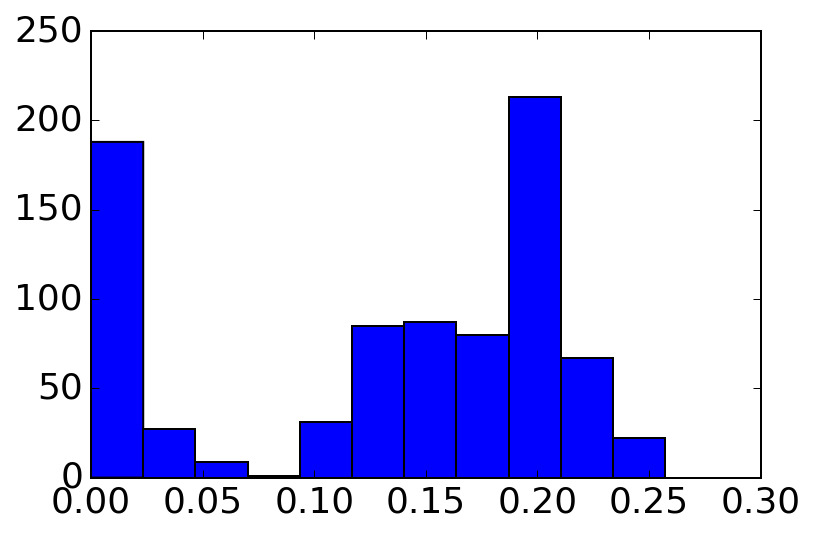

In [135]:
matplotlib.rcParams.update({'font.size': 18})

a= plt.hist(NPP_sum, bins = 'auto')

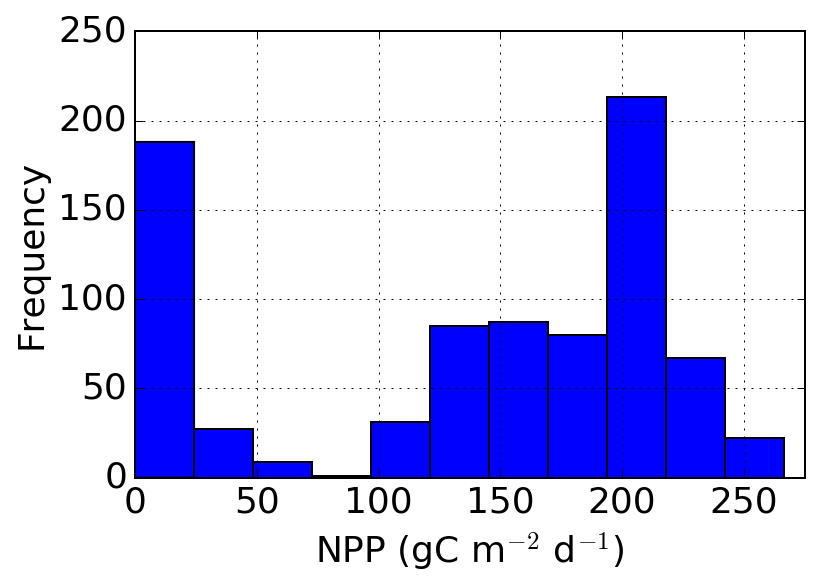

In [136]:
# NPP hist
matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure()
ax = fig.add_subplot(111)

# convert to gC/m^2 d-11=> *12/1000*86400
a=plt.hist(NPP_sum*12*0.001*86400, bins = 'auto')
#ax.set_xticklabels([])

plt.xlabel('NPP (gC m$^{-2}$ d$^{-1}$)')
plt.ylabel('Frequency')
plt.xlim((0, 275))
plt.grid()

In [137]:
a[1]

array([ -4.07302355e-25,   2.42477882e+01,   4.84955765e+01,
         7.27433647e+01,   9.69911529e+01,   1.21238941e+02,
         1.45486729e+02,   1.69734518e+02,   1.93982306e+02,
         2.18230094e+02,   2.42477882e+02,   2.66725671e+02])

In [138]:
zooC_sum = np.sum(tmzoo,axis = 1)

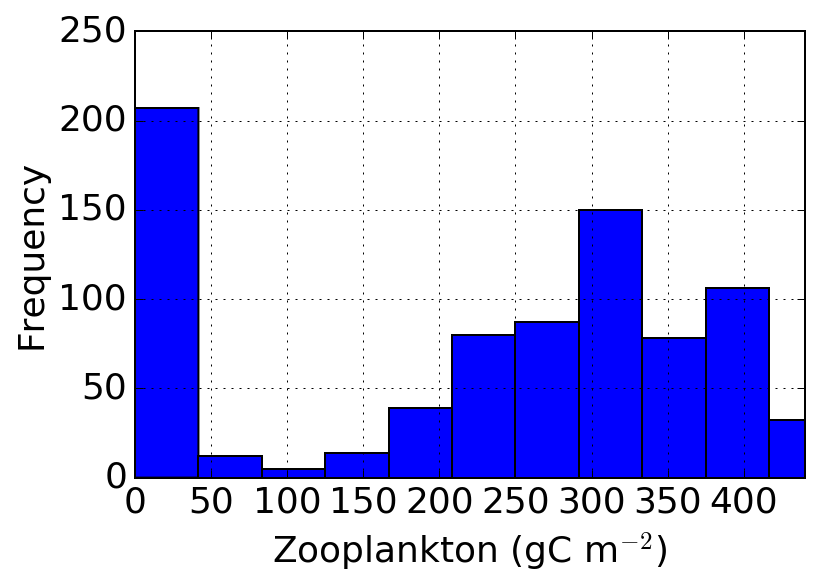

In [139]:

fig = plt.figure()
ax = fig.add_subplot(111)

# convert to gC/m^2 => *12/1000
a=plt.hist(zooC_sum*12*0.001, bins = 'auto')
#ax.set_xticklabels([])

plt.xlabel('Zooplankton (gC m$^{-2}$)')
plt.ylabel('Frequency')
plt.xlim(0,440)
plt.grid()

In [140]:
a[1]

array([ -4.71414763e-30,   4.16622758e+01,   8.33245517e+01,
         1.24986828e+02,   1.66649103e+02,   2.08311379e+02,
         2.49973655e+02,   2.91635931e+02,   3.33298207e+02,
         3.74960483e+02,   4.16622758e+02,   4.58285034e+02])

In [141]:
# find indexes of particles with >  zooC
zthresh = 360
fed_z = np.where(zooC_sum*12*0.001>zthresh)
print fed_z

(array([  6,   7,  20,  21,  22,  23,  51,  52,  53,  54,  63,  64,  65,
        76,  82,  83,  84,  85,  92, 105, 113, 114, 115, 116, 121, 122,
       133, 135, 136, 143, 144, 145, 150, 151, 152, 168, 171, 174, 175,
       176, 177, 179, 180, 181, 201, 205, 206, 207, 208, 211, 221, 224,
       227, 228, 230, 231, 235, 236, 238, 239, 240, 244, 245, 246, 249,
       251, 253, 256, 257, 261, 266, 267, 268, 269, 270, 276, 277, 283,
       286, 287, 288, 290, 296, 297, 298, 299, 306, 317, 327, 328, 329,
       336, 338, 355, 356, 357, 358, 359, 365, 366, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 396, 411, 412, 413, 414, 415, 416, 417,
       418, 425, 426, 428, 432, 438, 439, 440, 441, 442, 443, 444, 445,
       446, 448, 449, 468, 470, 471, 472, 473, 474, 499, 500, 501, 502,
       503, 522, 525, 529, 530, 531, 532, 550, 554, 559, 560, 589, 590,
       593, 618, 648, 649, 676, 678, 679, 708, 709, 738, 739, 767, 768,
       769, 797, 799]),)


In [142]:
fed_z[0].shape

(172,)

In [162]:
# find indexes of particles with > 0.17 NPP
zthresh = 220
fed_N = np.where(NPP_sum*12*0.001*86400>zthresh)
print fed_N

(array([  7,  21,  23,  51,  52,  54,  64,  65,  73,  76,  82,  83,  85,
        92, 113, 121, 143, 144, 145, 150, 177, 181, 201, 211, 212, 231,
       238, 239, 266, 267, 270, 273, 288, 296, 299, 306, 327, 356, 359,
       381, 382, 385, 387, 388, 396, 411, 412, 413, 416, 425, 438, 441,
       443, 444, 446, 468, 471, 499, 502, 525, 529, 530, 531, 550, 559,
       560, 581, 583, 589, 612, 618, 648, 649, 708, 738, 768, 794]),)


In [163]:
fed_N[0].shape

(77,)

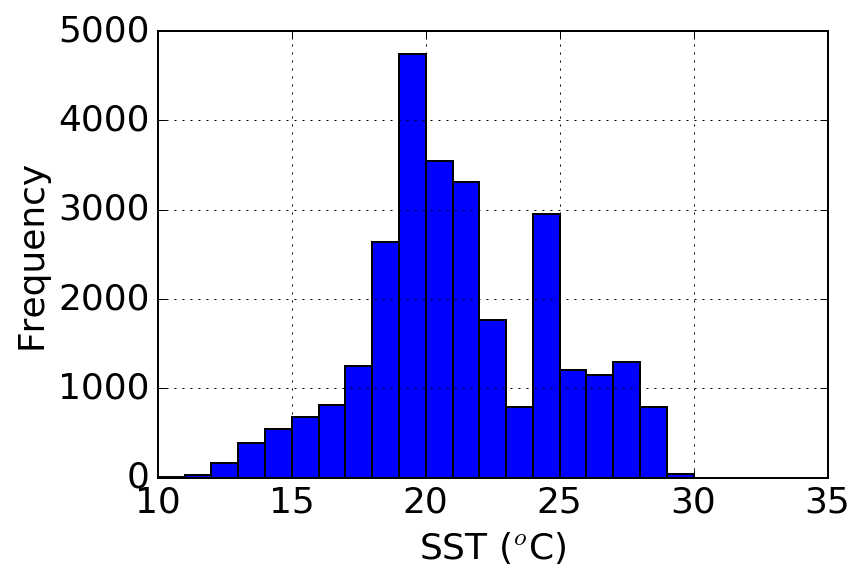

In [164]:
# what does temperature dist look like for fed turtles?


test = tmSST[fed_N,:].compressed()
test2 = test[test!=0]


matplotlib.rcParams.update({'font.size': 18})

mybins = np.arange(10,32,1)

a= plt.hist(test2, bins = mybins)
# having an issue with masked data

plt.xlabel("SST ($^o$C)")
plt.ylabel('Frequency')
plt.grid()


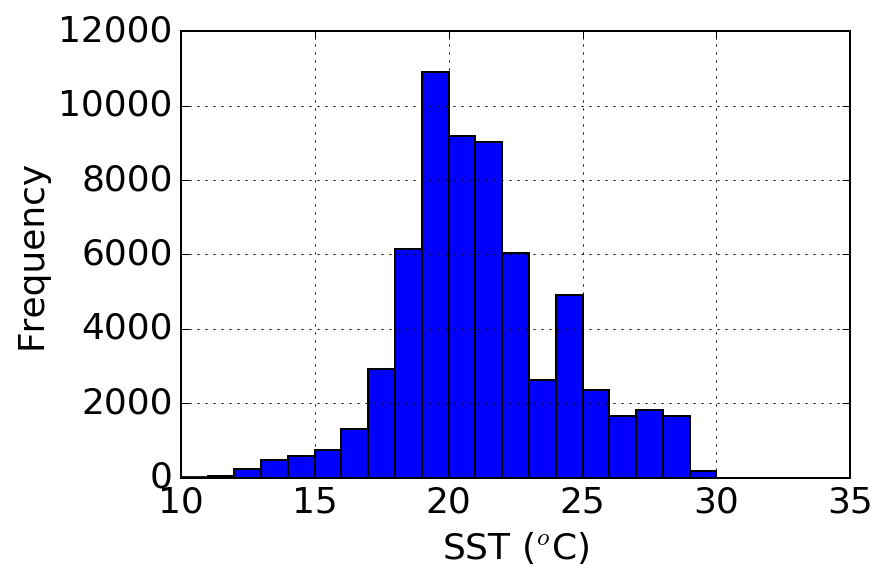

In [146]:
# what does temperature dist look like for fed turtles?

test = tmSST[fed_z,:].compressed()
test2 = test[test!=0]


matplotlib.rcParams.update({'font.size': 18})

mybins = np.arange(10,32,1)

a= plt.hist(test2, bins = mybins)
# having an issue with masked data

plt.xlabel("SST ($^o$C)")
plt.ylabel('Frequency')
plt.grid()

In [147]:
# now plot what they look like in space
# need to get some temperature field for vis

# check release location wrt topography

# get nest data file
# get subsetted data from cms 

nexpt1 = 'NP'
nexpt = 'NPmod'

path =  'nests_NP/'
date = "10902"
myfile = 'nest_1_000' + date + '000000.nc' 

mydata = nc.Dataset(path+myfile,'r')
lon = mydata.variables['Longitude'][:]
lat = mydata.variables['Latitude'][:]
u = mydata.variables['zu'][0,0,:,:]
v = mydata.variables['zv'][0,0,:,:]

sst = mydata.variables['zt'][0,0,:,:]
zoop = mydata.variables['zz'][0,0,:,:]
NPP = mydata.variables['zs'][0,0,:,:]



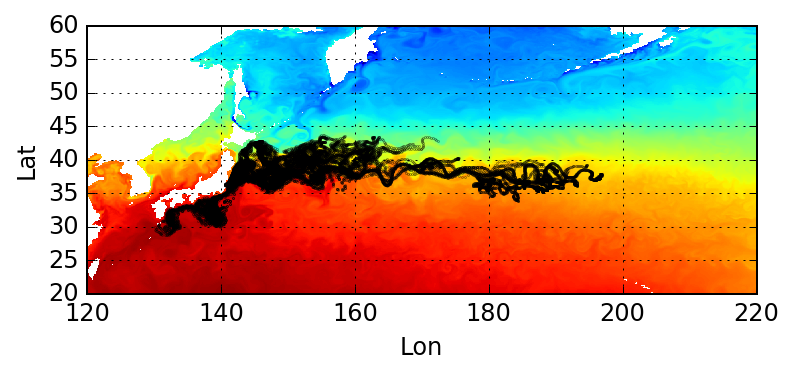

In [165]:
matplotlib.rcParams.update({'font.size': 12})
# NPP high 
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,sst)
#plt.colorbar()

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_N,:], tmlat[fed_N,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

#cbar.set_label("SST ($^o$C)", fontsize = 12 )

[120, 220, 20, 60]

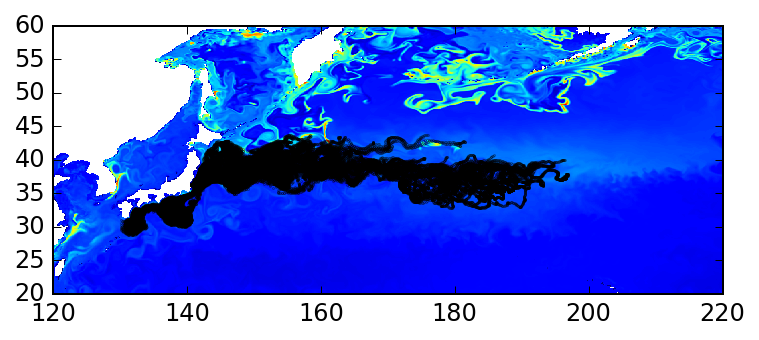

In [149]:
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,NPP)
#plt.colorbar()

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_N,:], tmlat[fed_N,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])


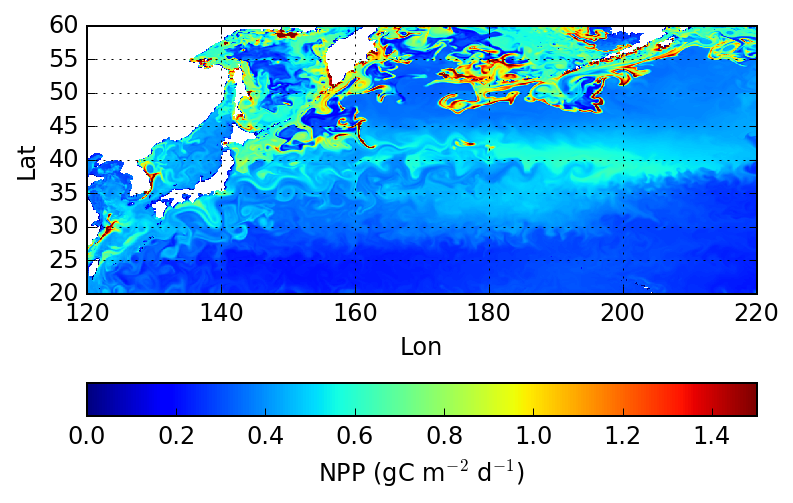

In [150]:
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,NPP*12*0.001*86400, vmax = 1.5)
c = plt.colorbar(orientation = 'horizontal', pad = 0.2)

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

#plt.scatter(tmlon[fed_N,:], tmlat[fed_N,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

c.set_label('NPP (gC m$^{-2}$ d$^{-1}$)', fontsize = 12 )

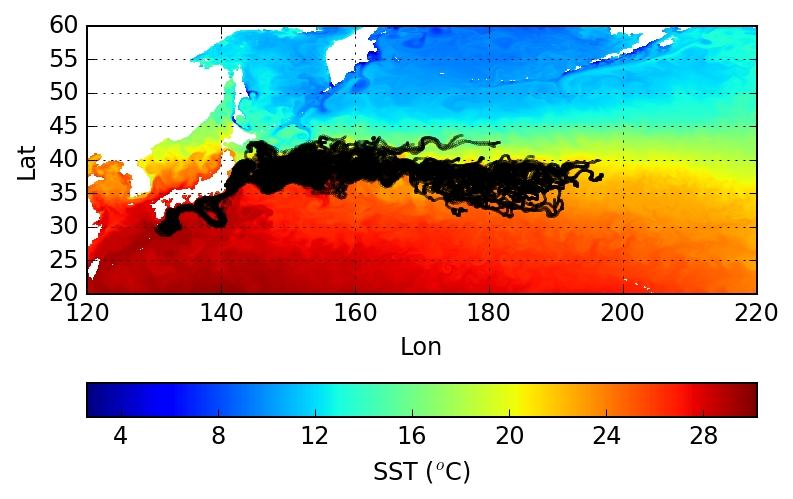

In [151]:
matplotlib.rcParams.update({'font.size': 12})

#SST for 8/5 
plt.pcolormesh(lon,lat,sst)
c = plt.colorbar(orientation = 'horizontal', pad = 0.2 )
#plt.axis('equal')
c.set_label("SST ($^o$C)", fontsize = 12 )

plt.axes().set_aspect('equal')
#plt.axis('tight')

plt.xlabel("Lon")
plt.ylabel("Lat")

# plot particles on top

plt.scatter(tmlon[fed_z,:], tmlat[fed_z,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

c.set_label("SST ($^o$C)", fontsize = 12 )

[120, 220, 20, 60]

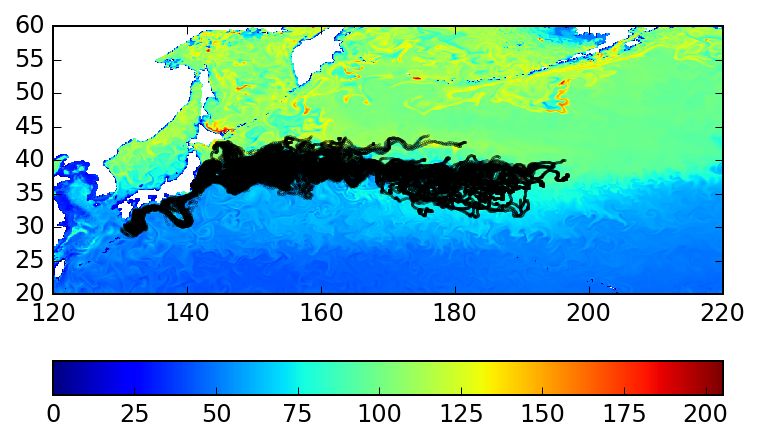

In [152]:
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,zoop)
c = plt.colorbar(orientation = 'horizontal')

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_z,:], tmlat[fed_z,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])

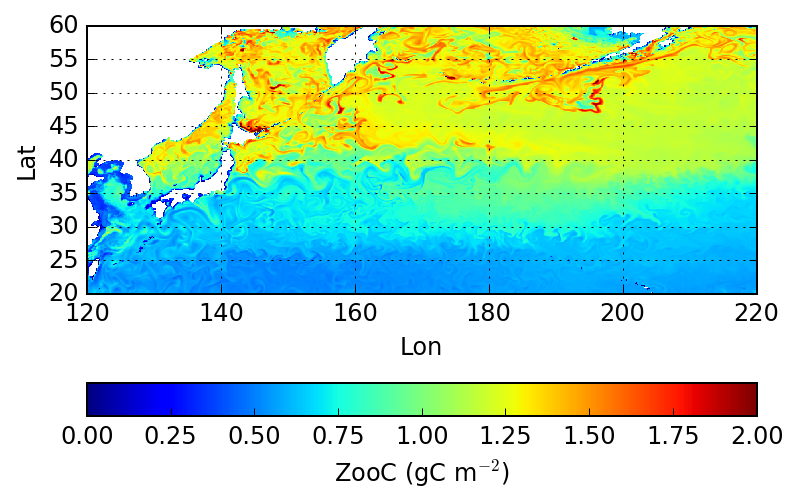

In [153]:
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,zoop*12*0.001, vmax = 2)
c = plt.colorbar(orientation = 'horizontal', pad = 0.2)

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

#plt.scatter(tmlon[fed_z,:], tmlat[fed_z,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

c.set_label('ZooC (gC m$^{-2}$)', fontsize = 12 )

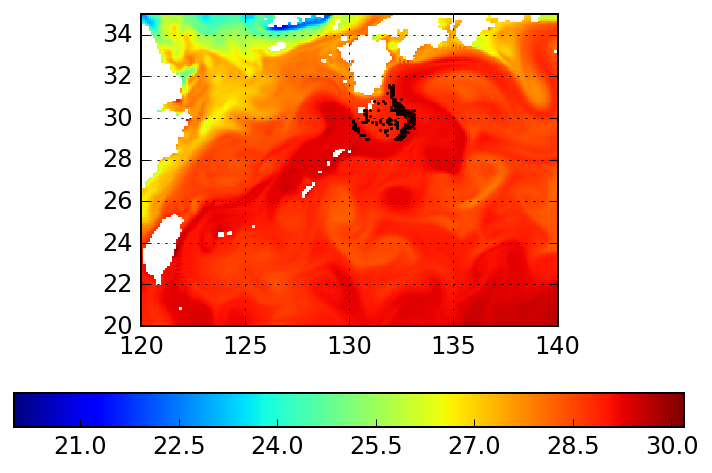

In [154]:
# what is the distribution of the intial releases?

# this is the full year run
# plot sst for the first day

plt.pcolormesh(lon,lat,sst, vmin = 20)
c = plt.colorbar(orientation = 'horizontal')

#plt.axis('equal')
plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_z,0], tmlat[fed_z,0], color = 'k', marker = '.', s = 1)

#plt.axis([120,170,20,45])
plt.axis([120,140,20,35])
plt.grid()
# most of the successful ones are acutally released on the north side of the jet

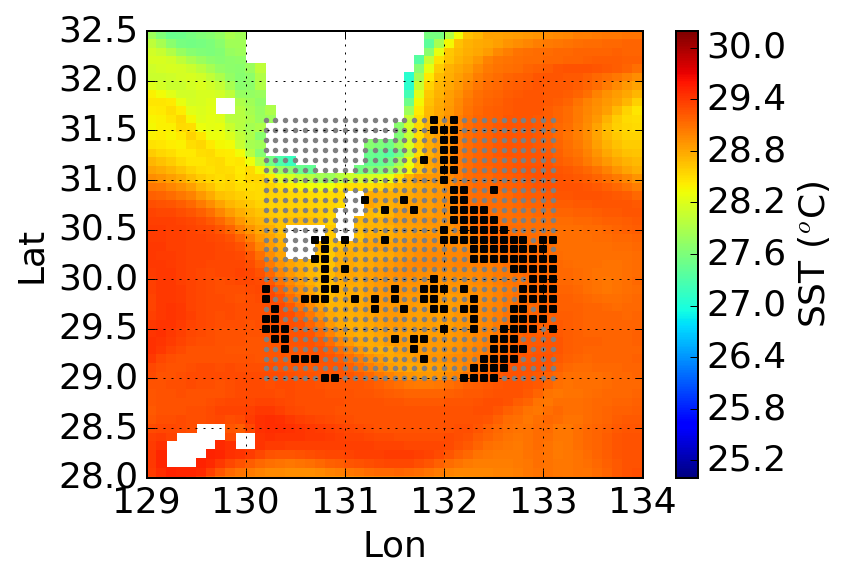

In [155]:
matplotlib.rcParams.update({'font.size': 18})

#same thing for npp

# what is the distribution of the intial releases?

# this is the full year run
# plot sst for the first day

plt.pcolormesh(lon,lat,sst, vmin = 25)
#c = plt.colorbar(orientation = 'horizontal')
c = plt.colorbar()
c.set_label("SST ($^o$C)")

#plt.axis('equal')
plt.axes().set_aspect('equal')

#plt.axis('tight')

size = 12
# plot particles on top
plt.scatter(tmlon[:,0], tmlat[:,0], color = 'grey', marker = '.', s = size)

plt.scatter(tmlon[fed_z,0], tmlat[fed_z,0], color = 'k', marker = 's', s = size)

#plt.axis([120,170,20,45])
plt.axis([129,134,28,32.5])
plt.xlabel("Lon")
plt.ylabel("Lat")

plt.grid()
# most of the successful ones are acutally released on the north side of the jet

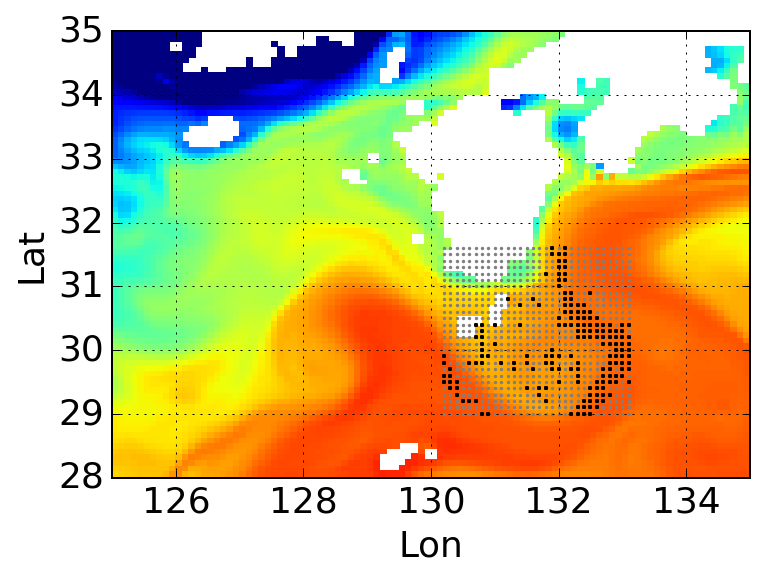

In [181]:
matplotlib.rcParams.update({'font.size': 18})

#same thing for npp

# what is the distribution of the intial releases?

# this is the full year run
# plot sst for the first day

plt.pcolormesh(lon,lat,sst, vmin = 25)
#c = plt.colorbar(orientation = 'horizontal')
#c = plt.colorbar()
#c.set_label("SST ($^o$C)")

#plt.axis('equal')
plt.axes().set_aspect('equal')

#plt.axis('tight')

size = 2
# plot particles on top
plt.scatter(tmlon[:,0], tmlat[:,0], color = 'grey', marker = '.', s = size)

plt.scatter(tmlon[fed_z,0], tmlat[fed_z,0], color = 'k', marker = 's', s = size)

#plt.axis([120,170,20,45])
plt.axis([125,135,28,35])
#plt.axis([129,134,28,32.5])
plt.xlabel("Lon")
plt.ylabel("Lat")

plt.grid()
# most of the successful ones are acutally released on the north side of the jet

In [156]:
# an interesting follow up question would be how does swimming affect the success rate?

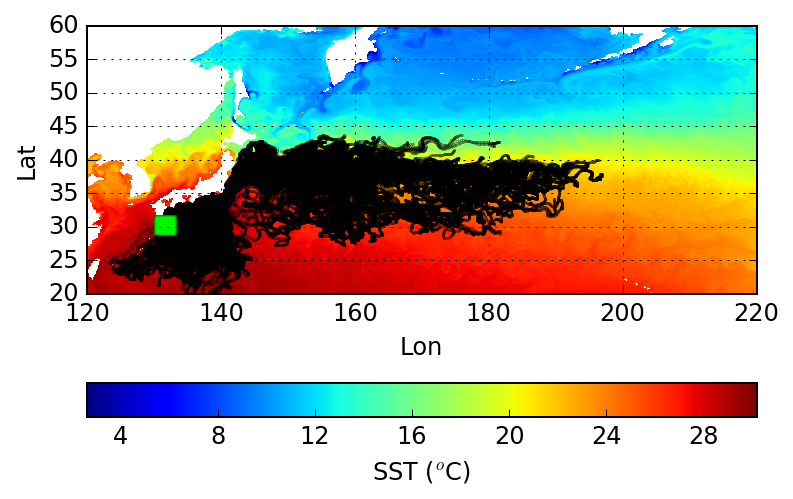

In [157]:
matplotlib.rcParams.update({'font.size': 12})

# make plots of all releases for poster

# this is the full year run
# plot sst for this day

#SST for 8/5 
im1 = plt.pcolormesh(lon,lat,sst)
cbar = plt.colorbar(im1,orientation = 'horizontal', pad = 0.2)
#cbar = plt.colorbar(im1)

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon, tmlat, color = 'k', marker = '.', s = 0.1)
plt.scatter(tmlon[:,0],tmlat[:,0], color = 'lime', marker = '.', s = 0.05)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()
cbar.set_label("SST ($^o$C)", fontsize = 12 )

(array([  7,  21,  23,  51,  52,  54,  64,  65,  76,  82,  85,  92, 113,
       121, 143, 144, 150, 201, 211, 239, 266, 267, 270, 288, 299, 327,
       356, 359, 382, 385, 387, 388, 412, 413, 441, 444, 471, 502, 529,
       530, 531, 550, 559, 589, 612, 618, 648, 708, 738, 768]),)


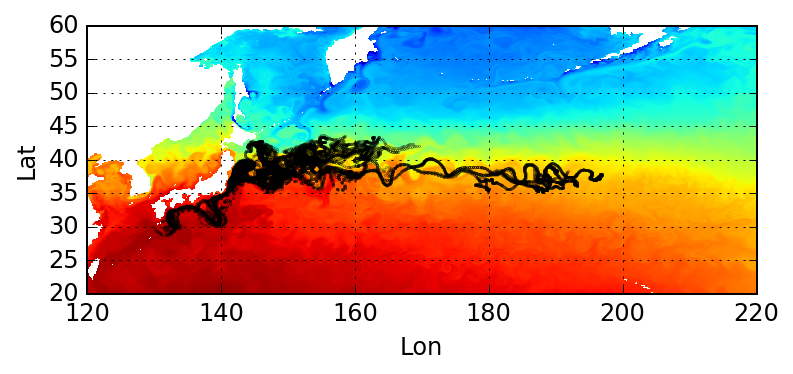

In [158]:
# What do the unsuccessful trajectories look like?
# find indexes of particles with < 100 NPP
zthresh = 225
fed_N = np.where(NPP_sum*12*0.001*86400>zthresh)
print fed_N

matplotlib.rcParams.update({'font.size': 12})
# NPP high 
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,sst)
#plt.colorbar()

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_N,:], tmlat[fed_N,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

#cbar.set_label("SST ($^o$C)", fontsize = 12 )



(array([  0,   3,  58,  60,  70, 106, 132, 134, 137, 146, 147, 160, 178,
       192, 195, 234, 295, 309, 398, 406, 435, 457, 461, 463, 464, 477,
       478, 479, 482, 487, 490, 492, 505, 506, 507, 521, 535, 537, 538,
       549, 563, 564, 565, 592, 594, 595, 621, 651, 652, 653, 680, 681,
       682, 710, 740, 770, 771, 802, 804, 807, 809]),)


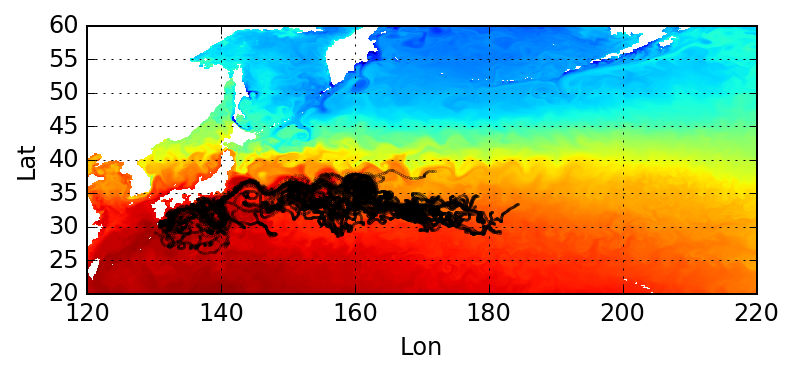

In [159]:
# What do the unsuccessful trajectories look like?
# find indexes of particles with < 100 NPP
zthresh = 100
fed_N = np.where((NPP_sum*12*0.001*86400<175) & (NPP_sum*12*0.001*86400>150))
print fed_N

matplotlib.rcParams.update({'font.size': 12})
# NPP high 
# this is the full year run
# plot sst for this day

#SST for 8/5 
plt.pcolormesh(lon,lat,sst)
#plt.colorbar()

#plt.axis('equal')

plt.axes().set_aspect('equal')

#plt.axis('tight')

# plot particles on top

plt.scatter(tmlon[fed_N,:], tmlat[fed_N,:], color = 'k', marker = '.', s = 0.1)

#plt.axis([120,170,20,45])
plt.axis([120,220,20,60])
plt.xlabel("Lon")
plt.ylabel("Lat")

#plt.title()
plt.grid()

#cbar.set_label("SST ($^o$C)", fontsize = 12 )


# Scratch

In [26]:
# need to reshape
a = np.array([[1,2,3], [4,5,6]])
b = np.reshape(a, -1)
b.shape

(6,)